In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
from scipy.signal import find_peaks
#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
#第一步選定需要比較的檔案
def coma(df):
    
    listRX1=[]
    listRX2=[]

    listRY1=[]
    listRY2=[]

    listRZ1=[]
    listRZ2=[]

    listLX1=[]
    listLX2=[]

    listLY1=[]
    listLY2=[]

    listLZ1=[]
    listLZ2=[]


    listGRX=[]
    listGRY=[]
    listGRZ=[]

    listGLX=[]
    listGLY=[]
    listGLZ=[]


    listflag_Record=[]
    listflag_one=[]
    listflag_two=[]
    listflag_three=[]

    listRtoe=[]
    listLtoe=[]

    listRX1=df.RightFootAcc_X.tolist() 
    listRY1=df.RightFootAcc_Y.tolist() 
    listRZ1=df.RightFootAcc_Z.tolist() 

    listLX1=df.LeftFootAcc_X.tolist() 
    listLY1=df.LeftFootAcc_Y.tolist() 
    listLZ1=df.LeftFootAcc_Z.tolist() 


    listGRX=df.RightFootGyro_X.tolist()
    listGRY=df.RightFootGyro_Y.tolist()
    listGRZ=df.RightFootGyro_Z.tolist()

    listGLX=df.LeftFootGyro_X.tolist()
    listGLY=df.LeftFootGyro_Y.tolist()
    listGLZ=df.LeftFootGyro_Z.tolist()

    listflag_Record=df.Record.tolist()
    listflag_one=df.Record.tolist()
    listflag_two=df.Record.tolist()
    listflag_three=df.Record.tolist()


    #去除空白
    listRX1 = [i for i in listRX1 if i != '']
    listRX2 = [i for i in listRX2 if i != '']

    listRY1 = [i for i in listRY1 if i != '']
    listRY2 = [i for i in listRY2 if i != '']

    listRZ1 = [i for i in listRZ1 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX1 = [i for i in listLX1 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLY1 = [i for i in listLY1 if i != '']
    listLY2 = [i for i in listLY2 if i != '']

    listLZ1 = [i for i in listLZ1 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']

    listGRX = [i for i in listGRX if i != '']
    listGRY = [i for i in listGRY if i != '']
    listGRZ = [i for i in listGRZ if i != '']

    listGLX = [i for i in listGLX if i != '']
    listGLY = [i for i in listGLY if i != '']
    listGLZ = [i for i in listGLZ if i != '']



   

    #抓出雙腳最大承認點數
    gaitmin=0
    if(len(listRX1)<len(listLX1)):
        gaitmin=len(listRX1)
    else:
        gaitmin=len(listLX1)
    print(gaitmin)
    #gaitmin=
    # #抓二級二級疼痛
    # for f in range(a):
    #     if(listflag_Record[f]=='2級二級疼痛'):
    #         listflag_Record[f]=f
    #     else:
    #         listflag_Record[f]=''
    # listflag_Record = [i for i in listflag_Record if i != '']

    #抓轉彎
    for f in range(len(listflag_Record)):
         if (f >= gaitmin):
            listflag_Record[f]=''
        
         elif(listflag_Record[f]=='轉彎'):
            listflag_Record[f]=f
        
         else:
            listflag_Record[f]=''

    listflag_Record = [i for i in listflag_Record if i != '']

    #抓一級二級疼痛
    for f in range(len(listflag_one)):
        
        if (f >= gaitmin):
            listflag_one[f]=''
        
        elif(listflag_one[f]=='1級疼痛'):
            listflag_one[f]=f
        
        else:
            listflag_one[f]=''

    listflag_one = [i for i in listflag_one if i != '']
    


    #抓二級二級疼痛
    for f in range(len(listflag_two)):
        if (f >= gaitmin):
            listflag_two[f]=''
        
        elif(listflag_two[f]=='2級疼痛'):
            listflag_two[f]=f
        
        else:
            listflag_two[f]=''
    listflag_two = [i for i in listflag_two if i != '']


    #抓三級二級疼痛
    for f in range(len(listflag_three)):
        if (f >= gaitmin):
            listflag_three[f]=''
        
        elif(listflag_three[f]=='3級疼痛'):
            listflag_three[f]=f
        
        else:
            listflag_three[f]=''
    listflag_three = [i for i in listflag_three if i != '']


    l=len(listRX1)
    #右腳X要乘-1
    for i in range(l):
        listRX1[i]= listRX1[i]*(-1)

    l=len(listGRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listGRZ[i]= listGRZ[i]*(-1)

    listRrss=[]
    for i in range(len(listRX1)): 
        listRrss.append(np.sqrt((listRX1[i] ** 2) + (listRY1[i] ** 2) + (listRZ1[i] ** 2))) 

    listLrss=[]
    for i in range(len(listLX1)): 
        listLrss.append(np.sqrt((listLX1[i] ** 2) + (listLY1[i] ** 2) + (listLZ1[i] ** 2))) 
    

    return listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss





#第一步選定需要比較的檔案
df = pd.read_excel("李O貴2.xlsx",keep_default_na=False)
listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss=coma(df)

# df = pd.read_excel("轉彎.xlsx",keep_default_na=False)
# listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record=coma(df)


# #
# #第二步選定切割的檔案"
# df = pd.read_excel("總李O貴2(手動切割).xlsx",keep_default_na=False)

# one=[]
# two=[]
# three=[]
# four=[]

# #one[0]為右腳第一步起始點
# one=df.Rtoe_off.tolist()


# #two[0]為左腳第一步起始點
# two=df.Ltoe_off.tolist() 


# #three為右腳每步間距點
# for i in range(len(one)-1):
#     three.append(one[i+1]-one[i])


# #four為左腳每步間距點
# for i in range(len(two)-1):
#     four.append(two[i+1]-two[i])



# print("右腳總步數")
# print(len(three)+1)
# #右腳:可以讓(後減前)=剩餘位置
# print("右腳每步間距")
# print(three)
# print("=====================================================================================================================================")

# print("左腳總步數")
# print(len(four)+1)
# #左腳:可以讓(後減前)=剩餘位置 
# print("左腳每步間距")
# print(four)
# print("=====================================================================================================================================")


if(len(listflag_Record)%2!=0):
    print("請先手動輸入補差值")
    print("=====================================================================================================================================")
    print("轉彎位置")
    print(listflag_Record)

# print(listflag_one)
# print(listflag_two)
# print(listflag_three)
#listGRY= savgol_filter(listGRY,30,3)
listGRX= savgol_filter(listGRX,20,3)
listGRY= savgol_filter(listGRY,30,3)
listGRZ= savgol_filter(listGRZ,30,3)

18499


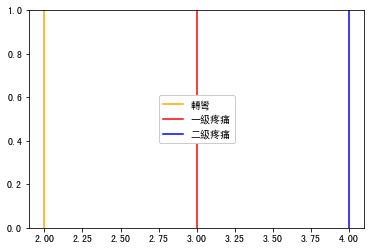

In [38]:
import matplotlib.pyplot as plt

# 建立數據
x = [1, 2, 3, 4, 5]
y = [1, 4, 3, 2, 5]

# 繪製線條


# 繪製多個垂直線並指定標籤
plt.axvline(x=2, color='orange' ,label='轉彎')
plt.axvline(x=3, color='red', label='一級疼痛')
plt.axvline(x=4, color='blue', label='二級疼痛')

# 添加圖例
plt.legend(loc="center", framealpha =1)


# 顯示圖形
plt.show()

In [ ]:
  #for i in range(len(flagturn)):
        
      

   # for i in range(len(flagone)):
        plt.axvline(x=flagone[i],color='red',label='一級疼痛')
     

    #for i in range(len(flagtwo)):
        plt.axvline(x=flagtwo[i],color='blue',label='二級疼痛')

In [ ]:

    for i in range(len(flagone)):
        if(flagone[i]<=Gstop):
            plt.axvline(x=flagone[i],c='red')


    for i in range(len(flagtwo)):
        if(flagtwo[i]<=Gstop):
            #print(flagtwo[i])
            #print(Gstop)
            plt.axvline(x=flagtwo[i],c='blue')


In [25]:
listflag_Record

[635,
 867,
 2687,
 2926,
 4894,
 5086,
 7343,
 7609,
 9620,
 10049,
 12035,
 12627,
 14827,
 15096,
 17241,
 17621]

In [18]:
# R_pain=np.array(listGRX[000:2500])
# R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
# plt.title("0:2500")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()
# R_pain_peaks=np.ndarray.tolist(R_pain_peaks)
# R_pain[R_pain_peaks]=np.ndarray.tolist(R_pain[R_pain_peaks])
# print(R_pain_peaks)
# print( R_pain[R_pain_peaks])



# R_pain=np.array(listGRX[2500:4000])
# R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
# plt.title("2500:4000")
# #xticks = np.arange(500, 1000, 100) # 設定X軸刻度

# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()

# print( R_pain[R_pain_peaks])
# R_pain_peaks=np.ndarray.tolist(R_pain_peaks)
# R_pain_peaks=[i+2500 for i in R_pain_peaks]

# print(R_pain_peaks)

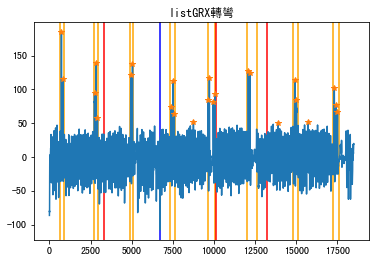

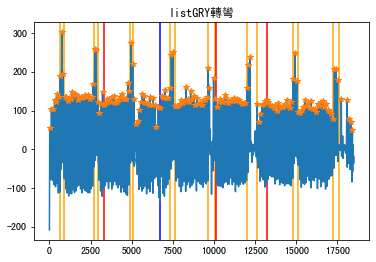

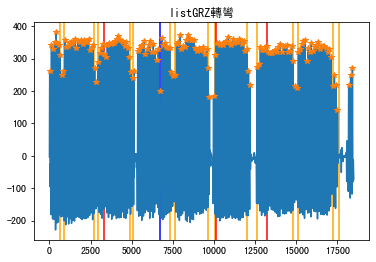

In [23]:

def G_plot(Gname,G,flagturn,flagone,flagtwo):#

    R_pain=np.array(G[000:18499])
    R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
    plt.title(str(Gname)+"轉彎")

    for i in range(len(flagturn)):
        plt.axvline(x=flagturn[i],c='orange')


    for i in range(len(flagone)):
        plt.axvline(x=flagone[i],c='red')


    for i in range(len(flagtwo)):
        plt.axvline(x=flagtwo[i],c='blue')



    plt.plot(R_pain)
    plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
    plt.show()

    # R_pain=np.array(G[000:18499])
    # R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
    # plt.title(str(Gname)+"一級疼痛")
    
    # for i in range(len(flagone)):
    #     plt.axvline(x=flagone[i],c='red')

    # plt.plot(R_pain)
    # plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
    # plt.show()

    # R_pain=np.array(G[000:18499])
    # R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
    # plt.title(str(Gname)+"二級疼痛")

    # for i in range(len(flagtwo)):
    #     plt.axvline(x=flagtwo[i],c='blue')

    # plt.plot(R_pain)
    # plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
    # plt.show()



G_plot("listGRX",listGRX,listflag_Record,listflag_one,listflag_two)
G_plot("listGRY",listGRY,listflag_Record,listflag_one,listflag_two)
G_plot("listGRZ",listGRZ,listflag_Record,listflag_one,listflag_two)


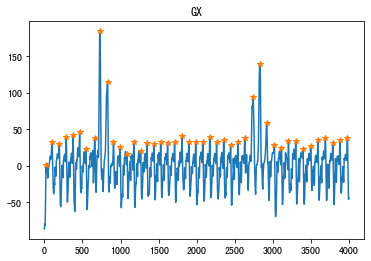

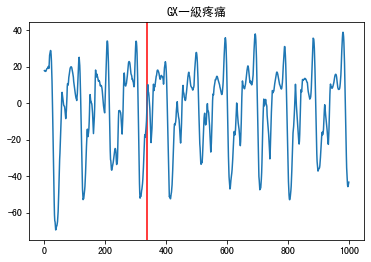

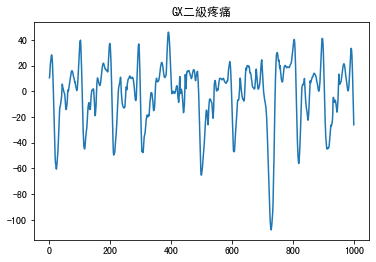

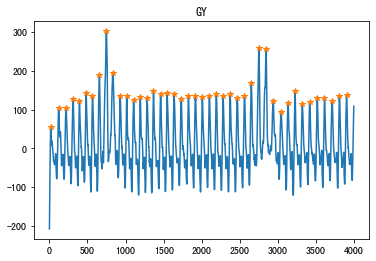

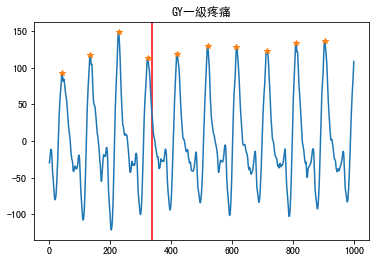

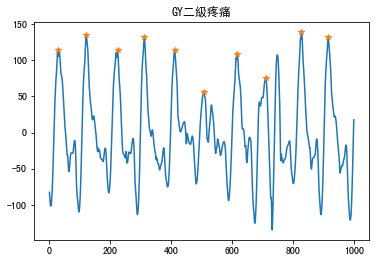

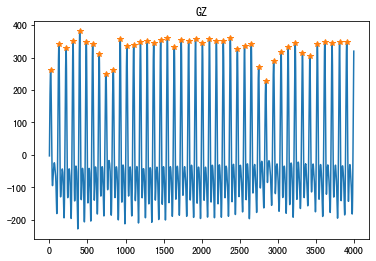

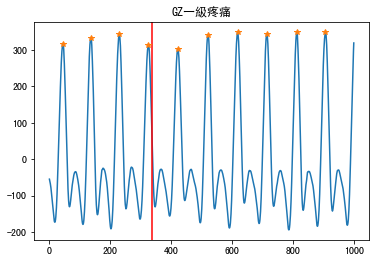

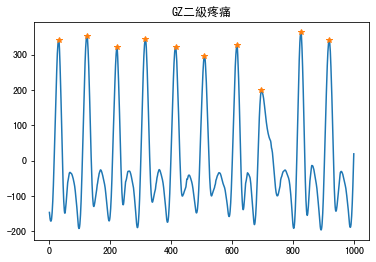

In [20]:
R_pain=np.array(listGRX[000:4000])
R_pain_peaks, _= find_peaks(R_pain,distance=70)
plt.title("GX")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

R_pain=np.array(listGRX[3000:4000])
R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
plt.title("GX一級疼痛")
plt.axvline(x=336,c='r')
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()


R_pain=np.array(listGRX[6000:7000])
R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
plt.title("GX二級疼痛")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

R_pain=np.array(listGRY[000:4000])
R_pain_peaks, _= find_peaks(R_pain,distance=80)
plt.title("GY")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

R_pain=np.array(listGRY[3000:4000])
R_pain_peaks, _= find_peaks(R_pain,distance=80)
plt.title("GY一級疼痛")
plt.axvline(x=336,c='r')
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

R_pain=np.array(listGRY[6000:7000])
R_pain_peaks, _= find_peaks(R_pain,distance=80)
plt.title("GY二級疼痛")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()



R_pain=np.array(listGRZ[000:4000])
R_pain_peaks, _= find_peaks(R_pain,distance=80)
plt.title("GZ")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

R_pain=np.array(listGRZ[3000:4000])
R_pain_peaks, _= find_peaks(R_pain,distance=80)
plt.title("GZ一級疼痛")
plt.plot(R_pain)
plt.axvline(x=336,c='r')
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()


R_pain=np.array(listGRZ[6000:7000])
R_pain_peaks, _= find_peaks(R_pain,distance=80)
plt.title("GZ二級疼痛")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

GRX

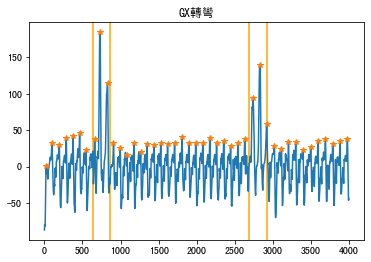

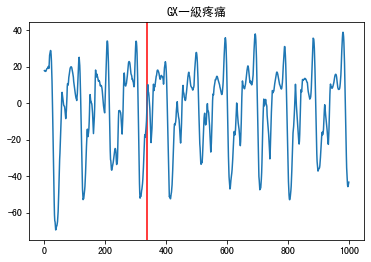

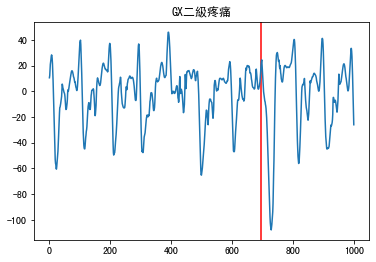

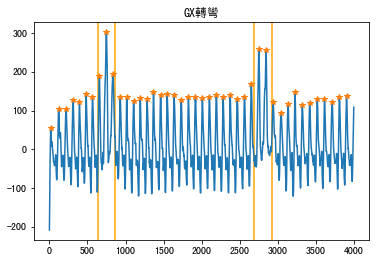

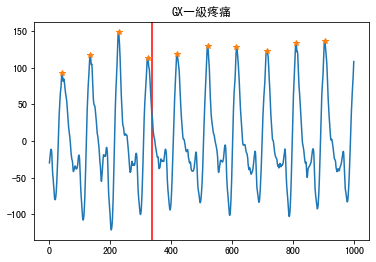

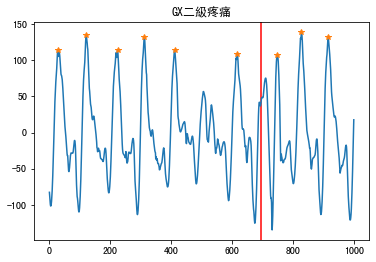

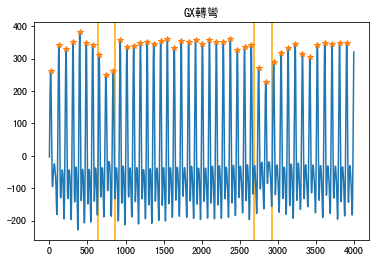

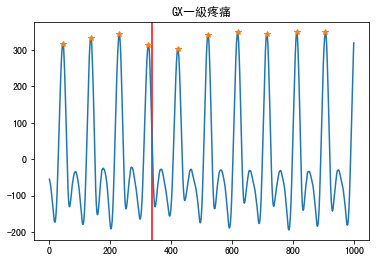

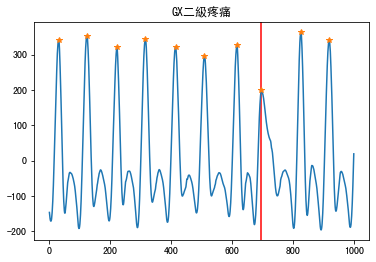

In [210]:

def G_plot(G):

    R_pain=np.array(G[000:4000])
    R_pain_peaks, _= find_peaks(R_pain,distance=70)
    plt.title("GX轉彎")
    plt.axvline(x=635,c='orange')
    plt.axvline(x=867,c='orange')

    plt.axvline(x=2687,c='orange')
    plt.axvline(x=2926,c='orange')


    plt.plot(R_pain)
    plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
    plt.show()

    R_pain=np.array(G[3000:4000])
    R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
    plt.title("GX一級疼痛")
    plt.axvline(x=336,c='r')
    plt.plot(R_pain)
    plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
    plt.show()

    R_pain=np.array(G[6000:7000])
    R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
    plt.title("GX二級疼痛")
    plt.axvline(x=694,c='r')
    plt.plot(R_pain)
    plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
    plt.show()



G_plot(listGRX)
G_plot(listGRY)
G_plot(listGRZ)


# R_pain=np.array(listGRY[000:4000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("GY轉彎")
# plt.axvline(x=635,c='orange')
# plt.axvline(x=867,c='orange')
# plt.axvline(x=2687,c='orange')
# plt.axvline(x=2926,c='orange')
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()

# R_pain=np.array(listGRY[3000:4000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("GY一級疼痛")
# plt.axvline(x=336,c='r')
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()

# R_pain=np.array(listGRY[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("GY二級疼痛")
# plt.axvline(x=694,c='r')
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()



# R_pain=np.array(listGRZ[000:4000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("GZ轉彎")
# plt.axvline(x=635,c='orange')
# plt.axvline(x=867,c='orange')
# plt.axvline(x=2687,c='orange')
# plt.axvline(x=2926,c='orange')
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()

# R_pain=np.array(listGRZ[3000:4000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("GZ一級疼痛")
# plt.plot(R_pain)
# plt.axvline(x=336,c='r')
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()


# R_pain=np.array(listGRZ[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("GZ二級疼痛")
# plt.axvline(x=694,c='r')
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()


# R_pain_peaks=np.ndarray.tolist(R_pain_peaks)
# #R_pain_peaks=[i+2500 for i in R_pain_peaks]
# print(R_pain_peaks)
# #print( R_pain[R_pain_peaks])


# R_pain=np.array(listGRX[:11000])*(-1)
# R_pain_peaks, _= find_peaks(R_pain,height=70,distance=70)
# plt.title(":11000")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()


# R_pain_peaks=np.ndarray.tolist(R_pain_peaks)
# #R_pain_peaks=[i+2500 for i in R_pain_peaks]
# print(R_pain_peaks)
# #print( R_pain[R_pain_peaks])





# R_pain=np.array(listGRX[5000:7000])
# R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
# plt.title("6000:7000")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()
# R_pain_peaks=np.ndarray.tolist(R_pain_peaks)
# R_pain[R_pain_peaks]=np.ndarray.tolist(R_pain[R_pain_peaks])
# print(R_pain_peaks)
# print( R_pain[R_pain_peaks])







# R_pain=np.array(listGRX[4000:7000])
# R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
# plt.title("4000:7000")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()
# R_pain_peaks=[i+4000 for i in R_pain_peaks]
# print(R_pain_peaks)
# print( R_pain[R_pain_peaks])


# R_pain=np.array(listGRY[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,height=50,distance=20)
# plt.title("listGRY")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()


# R_pain=np.array(listGRZ[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
# plt.title("listGRZ")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()


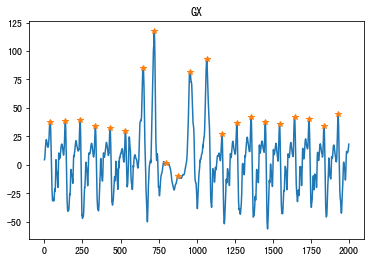

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
from scipy.signal import find_peaks
#Python之pandas读取Excel表格空值为nan的处理 https://blog.csdn.net/wl_Honest/article/details/99082977
#第一步選定需要比較的檔案
def coma(df):
    
    listRX1=[]
    listRX2=[]

    listRY1=[]
    listRY2=[]

    listRZ1=[]
    listRZ2=[]

    listLX1=[]
    listLX2=[]

    listLY1=[]
    listLY2=[]

    listLZ1=[]
    listLZ2=[]


    listGRX=[]
    listGRY=[]
    listGRZ=[]

    listGLX=[]
    listGLY=[]
    listGLZ=[]


    listflag_Record=[]
    listflag_one=[]
    listflag_two=[]
    listflag_three=[]

    listRtoe=[]
    listLtoe=[]

    listRX1=df.RightFootAcc_X.tolist() 
    listRY1=df.RightFootAcc_Y.tolist() 
    listRZ1=df.RightFootAcc_Z.tolist() 

    listLX1=df.LeftFootAcc_X.tolist() 
    listLY1=df.LeftFootAcc_Y.tolist() 
    listLZ1=df.LeftFootAcc_Z.tolist() 


    listGRX=df.RightFootGyro_X.tolist()
    listGRY=df.RightFootGyro_Y.tolist()
    listGRZ=df.RightFootGyro_Z.tolist()

    listGLX=df.LeftFootGyro_X.tolist()
    listGLY=df.LeftFootGyro_Y.tolist()
    listGLZ=df.LeftFootGyro_Z.tolist()

    listflag_Record=df.Record.tolist()
    listflag_one=df.Record.tolist()
    listflag_two=df.Record.tolist()
    listflag_three=df.Record.tolist()


    #去除空白
    listRX1 = [i for i in listRX1 if i != '']
    listRX2 = [i for i in listRX2 if i != '']

    listRY1 = [i for i in listRY1 if i != '']
    listRY2 = [i for i in listRY2 if i != '']

    listRZ1 = [i for i in listRZ1 if i != '']
    listRZ2 = [i for i in listRZ2 if i != '']

    listLX1 = [i for i in listLX1 if i != '']
    listLX2 = [i for i in listLX2 if i != '']

    listLY1 = [i for i in listLY1 if i != '']
    listLY2 = [i for i in listLY2 if i != '']

    listLZ1 = [i for i in listLZ1 if i != '']
    listLZ2 = [i for i in listLZ2 if i != '']

    listGRX = [i for i in listGRX if i != '']
    listGRY = [i for i in listGRY if i != '']
    listGRZ = [i for i in listGRZ if i != '']

    listGLX = [i for i in listGLX if i != '']
    listGLY = [i for i in listGLY if i != '']
    listGLZ = [i for i in listGLZ if i != '']



   

    #抓出雙腳最大承認點數
    gaitmin=0
    if(len(listRX1)<len(listLX1)):
        gaitmin=len(listRX1)
    else:
        gaitmin=len(listLX1)
    #print(gaitmin)
    gaitmin=9600
    # #抓二級二級疼痛
    # for f in range(a):
    #     if(listflag_Record[f]=='2級二級疼痛'):
    #         listflag_Record[f]=f
    #     else:
    #         listflag_Record[f]=''
    # listflag_Record = [i for i in listflag_Record if i != '']

    #抓轉彎
    for f in range(len(listflag_Record)):
         if (f >= gaitmin):
            listflag_Record[f]=''
        
         elif(listflag_Record[f]=='轉彎'):
            listflag_Record[f]=f
        
         else:
            listflag_Record[f]=''

    listflag_Record = [i for i in listflag_Record if i != '']

    #抓一級二級疼痛
    for f in range(len(listflag_one)):
        
        if (f >= gaitmin):
            listflag_one[f]=''
        
        elif(listflag_one[f]=='1級二級疼痛'):
            listflag_one[f]=f
        
        else:
            listflag_one[f]=''

    listflag_one = [i for i in listflag_one if i != '']
    


    #抓二級二級疼痛
    for f in range(len(listflag_two)):
        if (f >= gaitmin):
            listflag_two[f]=''
        
        elif(listflag_two[f]=='2級二級疼痛'):
            listflag_two[f]=f
        
        else:
            listflag_two[f]=''
    listflag_two = [i for i in listflag_two if i != '']


    #抓三級二級疼痛
    for f in range(len(listflag_three)):
        if (f >= gaitmin):
            listflag_three[f]=''
        
        elif(listflag_three[f]=='3級二級疼痛'):
            listflag_three[f]=f
        
        else:
            listflag_three[f]=''
    listflag_three = [i for i in listflag_three if i != '']


    l=len(listRX1)
    #右腳X要乘-1
    for i in range(l):
        listRX1[i]= listRX1[i]*(-1)

    l=len(listGRZ)
    #右腳陀螺儀Z軸要乘-1
    for i in range(l):
        listGRZ[i]= listGRZ[i]*(-1)

    listRrss=[]
    for i in range(len(listRX1)): 
        listRrss.append(np.sqrt((listRX1[i] ** 2) + (listRY1[i] ** 2) + (listRZ1[i] ** 2))) 

    listLrss=[]
    for i in range(len(listLX1)): 
        listLrss.append(np.sqrt((listLX1[i] ** 2) + (listLY1[i] ** 2) + (listLZ1[i] ** 2))) 
    

    return listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss





#第一步選定需要比較的檔案
df = pd.read_excel("李O貴術後.xlsx",keep_default_na=False)
listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record,listflag_one,listflag_two,listflag_three,listGRX,listGRY,listGRZ,listGLX,listGLY,listGLZ,listRrss,listLrss=coma(df)

# df = pd.read_excel("轉彎.xlsx",keep_default_na=False)
# listRX1,listRY1,listRZ1,listLX1,listLY1,listLZ1,listflag_Record=coma(df)


#
#第二步選定切割的檔案"
df = pd.read_excel("總李O貴2(手動切割).xlsx",keep_default_na=False)

one=[]
two=[]
three=[]
four=[]

#one[0]為右腳第一步起始點
one=df.Rtoe_off.tolist()


#two[0]為左腳第一步起始點
two=df.Ltoe_off.tolist() 


# #three為右腳每步間距點
# for i in range(len(one)-1):
#     three.append(one[i+1]-one[i])


# #four為左腳每步間距點
# for i in range(len(two)-1):
#     four.append(two[i+1]-two[i])



# print("右腳總步數")
# print(len(three)+1)
# #右腳:可以讓(後減前)=剩餘位置
# print("右腳每步間距")
# print(three)
# print("=====================================================================================================================================")

# print("左腳總步數")
# print(len(four)+1)
# #左腳:可以讓(後減前)=剩餘位置 
# print("左腳每步間距")
# print(four)
# print("=====================================================================================================================================")


if(len(listflag_Record)%2!=0):
    print("請先手動輸入補差值")
    print("=====================================================================================================================================")
    print("轉彎位置")
    print(listflag_Record)

# print(listflag_one)
# print(listflag_two)
# print(listflag_three)
#listGRY= savgol_filter(listGRY,30,3)
listGRX= savgol_filter(listGRX,20,3)
listGRY= savgol_filter(listGRY,30,3)
listGRZ= savgol_filter(listGRZ,30,3)

請先手動輸入補差值
轉彎位置
[2390, 2691, 4849, 5199, 7269, 7507, 9563]


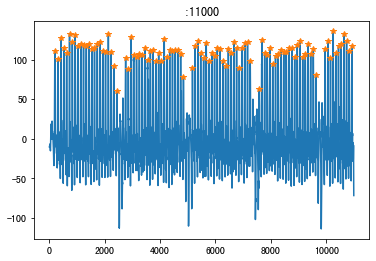

[195, 306, 416, 522, 621, 727, 827, 933, 1028, 1134, 1232, 1334, 1433, 1533, 1628, 1731, 1832, 1928, 2029, 2130, 2227, 2327, 2433, 2754, 2850, 2955, 3049, 3148, 3251, 3352, 3451, 3548, 3648, 3749, 3845, 3947, 4038, 4150, 4246, 4345, 4446, 4541, 4636, 4741, 4842, 5169, 5268, 5373, 5466, 5573, 5667, 5767, 5870, 5967, 6067, 6167, 6267, 6367, 6466, 6567, 6665, 6763, 6862, 6958, 7060, 7159, 7254, 7578, 7677, 7779, 7872, 7973, 8068, 8171, 8267, 8365, 8467, 8555, 8662, 8760, 8863, 8957, 9055, 9152, 9248, 9342, 9441, 9537, 9636, 9961, 10060, 10157, 10255, 10351, 10447, 10544, 10642, 10738, 10832, 10929]


In [166]:
R_pain=np.array(listGRX[:11000])*(-1)
R_pain_peaks, _= find_peaks(R_pain,height=60,distance=70)
plt.title(":11000")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()


R_pain_peaks=np.ndarray.tolist(R_pain_peaks)
#R_pain_peaks=[i+2500 for i in R_pain_peaks]
print(R_pain_peaks)
#print( R_pain[R_pain_peaks])

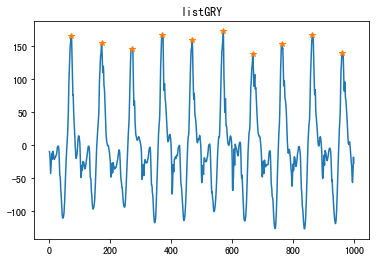

In [169]:
# listGRX= savgol_filter(listGRX,10,3)

# listGRZ= savgol_filter(listGRZ,10,3)


# R_pain=np.array(listGRZ[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()

#plt.title("左腳foot_flat")

# R_pain=np.array(listGRZ[000:4000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()
# R_pain=np.array(listGRX[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()



# R_pain=np.array(listGRY[:3000])
# R_pain_peaks, _= find_peaks(R_pain,distance=80)
# plt.title("listGRY")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()




# R_pain=np.array(listGRY[000:2000])
# R_pain_peaks, _= find_peaks(R_pain,height=150,distance=70)
# plt.title("listGRY")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()



# test=[]
# test.append(R_pain[R_pain_peaks].astype(int))
# test=np.array(test)
# # print(R_pain_peaks)
# # print( R_pain[R_pain_peaks])
# # print(test)
# # print(len(test))
# b =np.ndarray.tolist(test.reshape(-1))
# # print(b)
# # print(type(b))
# testavg=np.average(b) 
# print(testavg)
# flag=[]

# for i in b:
#     if i>=testavg:
#         flag.append(1)
#     else:
#         flag.append(0)
# plt.plot(flag)
# plt.show()

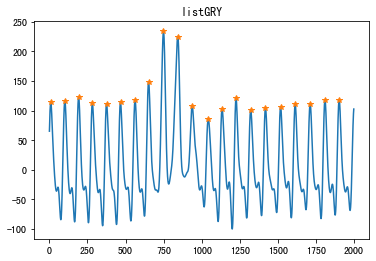

123.66666666666667


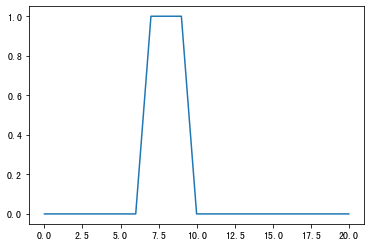

In [82]:
listGRX= savgol_filter(listGRX,10,3)

listGRZ= savgol_filter(listGRZ,10,3)


listGRY= savgol_filter(listGRY,30,3)
R_pain=np.array(listGRY[2000:4000])
R_pain_peaks, _= find_peaks(R_pain,height=50,distance=70)
plt.title("listGRY")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()
test=[]
test.append(R_pain[R_pain_peaks].astype(int))
test=np.array(test)
# print(R_pain_peaks)
# print( R_pain[R_pain_peaks])
# print(test)
# print(len(test))
b =np.ndarray.tolist(test.reshape(-1))
# print(b)
# print(type(b))
testavg=np.average(b) 
print(testavg)
flag=[]

for i in b:
    if i>=testavg:
        flag.append(1)
    else:
        flag.append(0)
plt.plot(flag)
plt.show()

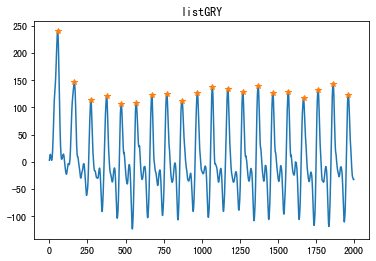

130.9


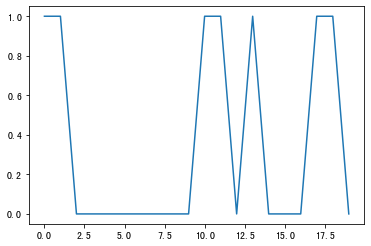

In [172]:
listGRY= savgol_filter(listGRY,30,3)
R_pain=np.array(listGRY[5000:7000])
R_pain_peaks, _= find_peaks(R_pain,distance=70)
plt.title("listGRY")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()
test=[]
test.append(R_pain[R_pain_peaks].astype(int))
test=np.array(test)
b =np.ndarray.tolist(test.reshape(-1))

testavg=np.average(b) 
print(testavg)
flag=[]

for i in b:
    if i>=testavg:
        flag.append(1)
    else:
        flag.append(0)
plt.plot(flag)
plt.show()

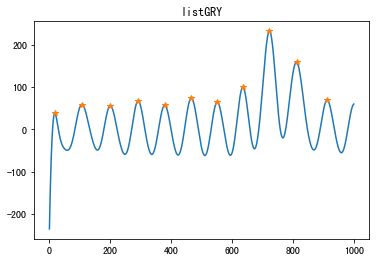

[ 38.06899325  58.53836791  55.72699747  66.51262713  56.52450974
  73.24609389  63.81337771  99.21971749 231.26513459 158.45117828
  68.31527374]
[ 17 107 200 291 378 466 551 635 722 811 912]
231
158


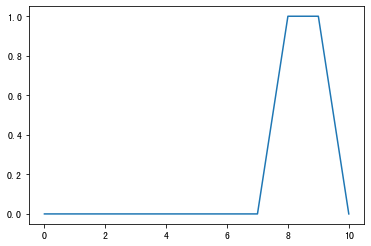

In [66]:
listGRY= savgol_filter(listGRY,30,3)

R_pain=np.array(listGRY[:1000])
R_pain_peaks, _= find_peaks(R_pain,distance=70)
plt.title("listGRY")
plt.plot(R_pain)
plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
plt.show()

# listGRY=listGRY*(-1)
# R_pain=np.array(listGRY[6000:7000])
# R_pain_peaks, _= find_peaks(R_pain,distance=70)
# plt.title("listGRY")
# plt.plot(R_pain)
# plt.plot(R_pain_peaks, R_pain[R_pain_peaks],"*")
# plt.show()


test=[]
test.append(R_pain[R_pain_peaks].astype(int))
test=np.array(test)
b =np.ndarray.tolist(test.reshape(-1))
print(R_pain[R_pain_peaks])
print(R_pain_peaks)
# for i in range(len(R_pain_peaks)):
#     if(R_pain_peaks[i+1]>694):



testavg=np.average(b) 
#print(testavg)

flag=[]
testflag=0
for i in b:
    if i>=100:
        flag.append(1)
        print(i)
    else:
        flag.append(0)

plt.plot(flag)
#plt.axvline(x=694,c='r')
plt.show()